In [1]:
# from imblearn.over_sampling import SMOTE
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import *
import seaborn as sns

import matplotlib.pyplot as plt
import warnings

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [5, 2.5]
plt.rcParams['figure.dpi'] = 150
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("./data/credit_card_default.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
try:
    assert sns.__version__ != "0.13.2" 
    raise ValueError("유효하지 않은 입력 값입니다. 양수를 입력해야 합니다.")
except Exception as e :
    print(f"{e} sns 버전 확인 필요")
    

 sns 버전 확인 필요


In [4]:
import warnings
warnings.filterwarnings('ignore')

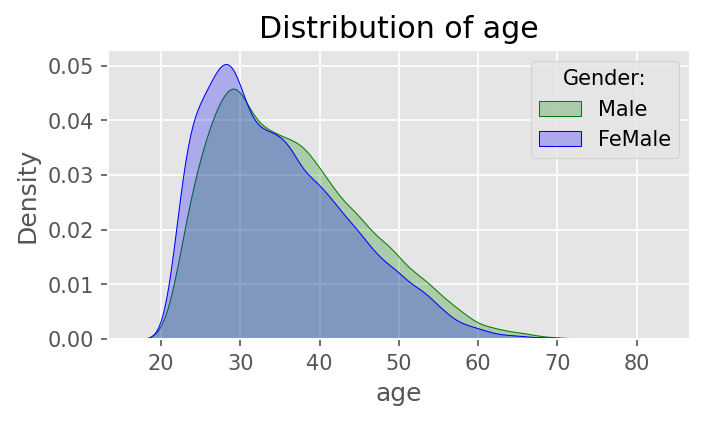

In [5]:
fig, ax = plt.subplots()
sns.distplot(df.loc[df.sex=='Male', 'age'].dropna(), hist=False, color='green', kde_kws={'shade' : True}, label='Male')
sns.distplot(df.loc[df.sex=='Female', 'age'].dropna(), hist=False, color='blue', kde_kws={'shade' : True},label='FeMale')
ax.set_title("Distribution of age")
ax.legend(title="Gender:")

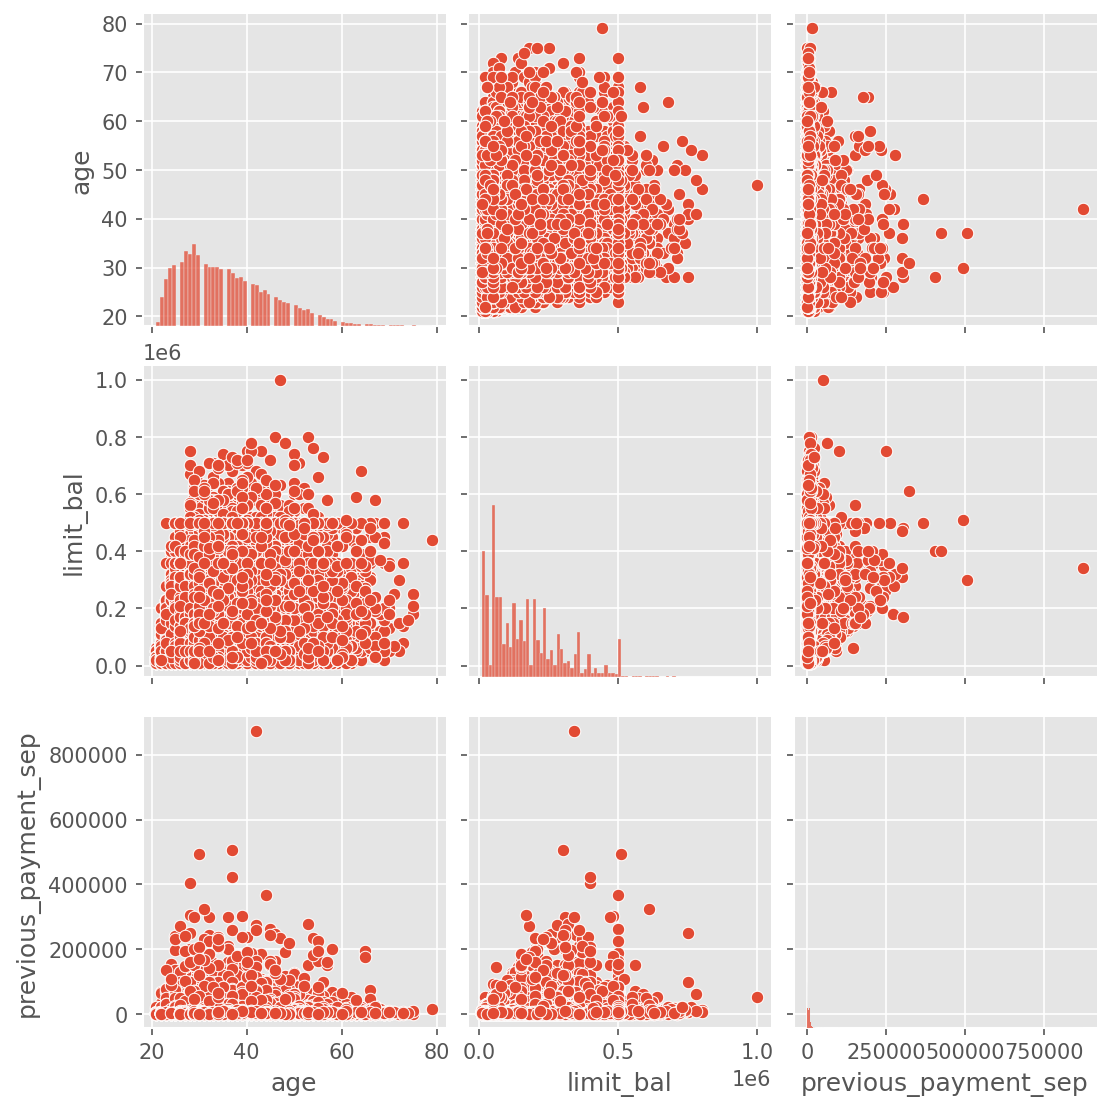

In [6]:
sns.pairplot(df[['age', 'limit_bal', 'previous_payment_sep']])

In [7]:
corr_matrix = df.select_dtypes(include='number').corr()


In [8]:
import numpy as np
mask = np.zeros_like(corr_matrix, dtype=bool)

<Axes: >

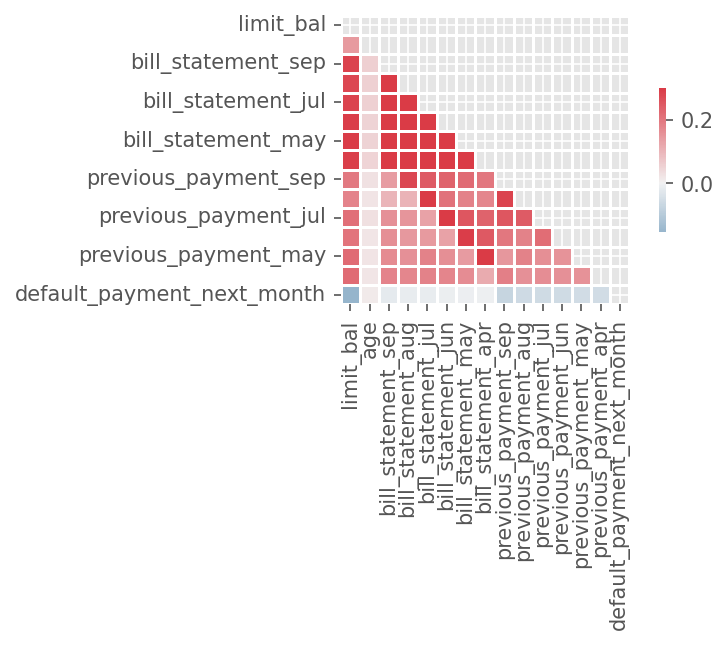

In [9]:
import numpy as np 
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=0.3, center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink' : 0.5})

In [10]:
df.select_dtypes(include='number').corr()[['default_payment_next_month']]

,default_payment_next_month
limit_bal,-0.153520
age,0.014491
bill_statement_sep,-0.019644
bill_statement_aug,-0.014193
bill_statement_jul,-0.014076
bill_statement_jun,-0.010156
bill_statement_may,-0.006760
bill_statement_apr,-0.005372
previous_payment_sep,-0.072929
previous_payment_aug,-0.058579


<Axes: xlabel='education', ylabel='limit_bal'>

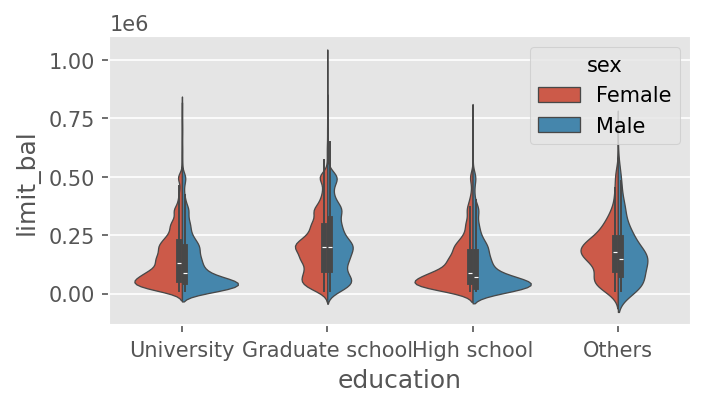

In [11]:
sns.violinplot(data=df, x = 'education', y='limit_bal', hue='sex', split=True,
               )

<Axes: xlabel='default_payment_next_month', ylabel='count'>

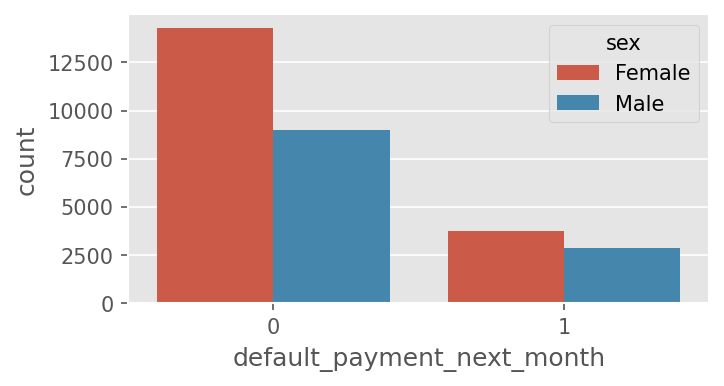

In [13]:
sns.countplot(x='default_payment_next_month', hue='sex',  data=df)

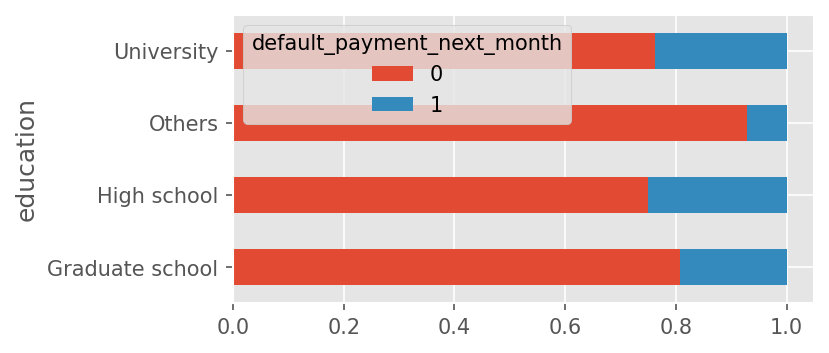

In [14]:
ax = df.groupby('education')['default_payment_next_month'].value_counts(normalize=True).unstack().plot(kind='barh', stacked='True')

In [ ]:
from sklearn.model_selection import train_test_split

y = df.pop('default_payment_next_month')

train_X, test_X, train_y, test_y = train_test_split(df, y, test_size=0.2, stratify=y, random_state=42)

### 결측치 
- 집계 지표로 대체 (양적-중앙값)
- 질적(범주형) - 빈도수가 가장 많은 값

In [22]:
NUM_FEATURES = ['age']
CAT_FEATURES = ['sex', 'education', 'marriage']

In [24]:
from sklearn.impute import SimpleImputer
for col in NUM_FEATURES:
    num_imputer = SimpleImputer(strategy='median')
    num_imputer.fit(train_X[[col]])
    train_X.loc[:, col] = num_imputer.transform(train_X[[col]])
    test_X.loc[:, col] = num_imputer.transform(test_X[[col]])

In [26]:
for col in CAT_FEATURES:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer.fit(train_X[[col]])
    train_X.loc[:, col] = cat_imputer.transform(train_X[[col]])
    test_X.loc[:, col] = cat_imputer.transform(test_X[[col]])

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [28]:
COL = 'education'

X_train_copy = train_X.copy()
X_test_copy = test_X.copy()

label_enc = LabelEncoder()
label_enc.fit(X_train_copy[COL])
X_train_copy.loc[:, COL] = label_enc.transform(X_train_copy[COL])
X_test_copy.loc[:, COL] = label_enc.transform(X_test_copy[COL])

In [37]:
train_X.loc[:16950, COL]

22788         University
29006    Graduate school
16950         University
Name: education, dtype: object

In [33]:
X_train_copy.loc[:16950, COL]

22788    3
29006    0
16950    3
Name: education, dtype: object

In [47]:
from sklearn.preprocessing import OrdinalEncoder

In [49]:
train_X.education.unique()

array(['University', 'Graduate school', 'High school', 'Others'],
      dtype=object)

In [57]:
oren =OrdinalEncoder(categories=[['Others', 'High school', 'University', 'Graduate school']])

In [60]:
train_X.education[:3]

22788         University
29006    Graduate school
16950         University
Name: education, dtype: object

In [68]:
[int(x[0]) for x in oren.fit_transform(train_X[['education']])]

[2,
 3,
 2,
 3,
 3,
 3,
 1,
 2,
 3,
 2,
 2,
 3,
 3,
 2,
 1,
 3,
 1,
 3,
 1,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 0,
 2,
 2,
 1,
 2,
 1,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 3,
 1,
 3,
 2,
 2,
 1,
 2,
 3,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 2,
 3,
 2,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 1,
 3,
 3,
 2,
 2,
 3,
 1,
 2,
 2,
 1,
 2,
 2,
 3,
 3,
 2,
 2,
 1,
 3,
 2,
 2,
 3,
 2,
 1,
 3,
 1,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 0,
 2,
 1,
 3,
 3,
 2,
 1,
 1,
 3,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 1,
 3,
 3,
 3,
 3,
 2,
 1,
 2,
 3,
 3,
 1,
 3,
 3,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 2,
 3,
 1,
 1,
 3,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 1,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 3,
 2,
 3,
 1,
 3,
 2,
 3,
 3,
 2,
 1,
 3,
 1,
 1,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 0,
 2,
 1,
 2,


In [70]:
X_train_copy.education = X_train_copy.education.astype(int)

In [73]:
CAT_FEATURES = X_train_copy.select_dtypes(include='object').columns.tolist()

In [74]:
from sklearn.preprocessing import OneHotEncoder

In [80]:
one_hot_encoder = OneHotEncoder(sparse_output=False, 
                                handle_unknown='error', 
                                drop='first')

In [76]:
import numpy as np
from scipy.sparse import csr_matrix

# 밀집 행렬 생성
dense_matrix = np.array([
    [1, 0, 0, 0],
    [0, 0, 2, 0],
    [0, 3, 0, 4]
])


In [77]:
sparse_csr = csr_matrix(dense_matrix)

In [79]:
print(sparse_csr)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4 stored elements and shape (3, 4)>
  Coords	Values
  (0, 0)	1
  (1, 2)	2
  (2, 1)	3
  (2, 3)	4


In [84]:
one_hot_encoder = OneHotEncoder(sparse_output=False, 
                                handle_unknown='error', 
                                drop='first')
one_hot_transformer.fit(X_train_copy)

ColumnTransformer(transformers=[('one_hot',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['sex', 'marriage', 'payment_status_sep',
                                  'payment_status_aug', 'payment_status_jul',
                                  'payment_status_jun', 'payment_status_may',
                                  'payment_status_apr'])])

In [91]:
X_train_cat = pd.DataFrame(one_hot_transformer.transform(X_train_copy), columns=one_hot_transformer.get_feature_names_out(),
                          index=X_train_copy.index
                          )

In [92]:
X_train_cat.head(3)

,one_hot__sex_Male,one_hot__marriage_Others,one_hot__marriage_Single,one_hot__payment_status_sep_Payment delayed 1 month,one_hot__payment_status_sep_Payment delayed 2 months,one_hot__payment_status_sep_Payment delayed 3 months,one_hot__payment_status_sep_Payment delayed 4 months,one_hot__payment_status_sep_Payment delayed 5 months,one_hot__payment_status_sep_Payment delayed 6 months,one_hot__payment_status_sep_Payment delayed 7 months,...,one_hot__payment_status_may_Payment delayed 8 months,one_hot__payment_status_may_Unknown,one_hot__payment_status_apr_Payment delayed 2 months,one_hot__payment_status_apr_Payment delayed 3 months,one_hot__payment_status_apr_Payment delayed 4 months,one_hot__payment_status_apr_Payment delayed 5 months,one_hot__payment_status_apr_Payment delayed 6 months,one_hot__payment_status_apr_Payment delayed 7 months,one_hot__payment_status_apr_Payment delayed 8 months,one_hot__payment_status_apr_Unknown
22788,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29006,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16950,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [94]:
X_train_final = pd.concat([X_train_copy.select_dtypes(include='number'), X_train_cat], axis=1)

In [98]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_final, train_y)

DecisionTreeClassifier(random_state=42)

In [100]:
test_X.isnull().sum()

limit_bal               0
sex                     0
education               0
marriage                0
age                     0
payment_status_sep      0
payment_status_aug      0
payment_status_jul      0
payment_status_jun      0
payment_status_may      0
payment_status_apr      0
bill_statement_sep      0
bill_statement_aug      0
bill_statement_jul      0
bill_statement_jun      0
bill_statement_may      0
bill_statement_apr      0
previous_payment_sep    0
previous_payment_aug    0
previous_payment_jul    0
previous_payment_jun    0
previous_payment_may    0
previous_payment_apr    0
dtype: int64

In [115]:
one_hot_transformer.transform(X_test_copy)
X_test_cat = pd.DataFrame(one_hot_transformer.transform(X_test_copy), columns=one_hot_transformer.get_feature_names_out(),
                          index=X_test_copy.index
                          )
X_test_copy.education = X_test_copy.education.astype(int)
X_test_final = pd.concat([X_test_copy.select_dtypes(include='number'), X_test_cat], axis=1)

In [117]:
from sklearn.metrics import *

In [118]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [119]:
confusion_matrix(test_y, dt.predict(X_test_final))

array([[3788,  885],
       [ 810,  517]])

In [120]:
precision_score(test_y, dt.predict(X_test_final))

np.float64(0.36875891583452214)

In [121]:
accuracy_score(test_y, dt.predict(X_test_final))

0.7175

In [122]:
recall_score(test_y, dt.predict(X_test_final))

np.float64(0.3896006028636021)

In [123]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 2.8 MB/s eta 0:00:0000:0100:03m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 7.7 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]m1/2 [xgboost]
Note: you may need to restart the kernel to use updated packages.
